In [10]:
#coding:utf-8
C={}
n=30
R=10000

import random
for i in range(n):
    x=random.randint(0,R)
    y=random.randint(0,R)
    C[i]=(x,y)
    
print(C)

{0: (9460, 4546), 1: (111, 4455), 2: (3761, 5273), 3: (5564, 2257), 4: (8257, 5180), 5: (1283, 9491), 6: (8375, 3366), 7: (7872, 4996), 8: (8017, 4767), 9: (9527, 5887), 10: (5514, 3483), 11: (1559, 2090), 12: (6725, 7350), 13: (2936, 7625), 14: (643, 8261), 15: (989, 5463), 16: (5548, 7089), 17: (6449, 9372), 18: (7154, 2256), 19: (3415, 5155), 20: (5838, 7510), 21: (2459, 8673), 22: (1956, 1930), 23: (9899, 1410), 24: (2758, 4589), 25: (3563, 9705), 26: (1425, 7427), 27: (3626, 6770), 28: (8800, 4251), 29: (3400, 6224)}


In [11]:
#都市間距離
def distance(pa,pb):
    return ((pa[0]-pb[0])**2+(pa[1]-pb[1])**2)**0.5

import networkx as nx

def graph_of_tour(tour):
    Gt=nx.Graph()
    for i in range(len(tour)):
        ci=tour[i]
        if i==len(tour)-1:
            ci=tour[0]
        else:
            cj=tour[i+1]
        Gt.add_edge(ci,cj,weight=distance(C[ci],C[cj]))
    return Gt

In [12]:
import time
def tsp_solve(C,timelimit=500):
    G=nx.Graph()

    for v in C:
        G.add_node(v)
    for i,ci in enumerate(C):
        for j,cj in enumerate(C):
            if i<j:
                G.add_edge(ci,cj,weight=distance(C[ci],C[cj]))
    # 最近傍法
    v=0
    min_d,min_u=100000000,None

    for u in G[v]:
        print(u,G[v][u]["weight"])
        if min_d>G[v][u]["weight"]:
            min_d=G[v][u]["weight"]
            min_u=u
    print(min_d,min_u)

    tour=[0]
    visited={0:True}

    while len(tour)<len(C):
        v=tour[-1]
        
        min_d,min_u=100000000,None
        for u in G[v]:
            if min_d>G[v][u]["weight"] and u not in visited:
                min_d=G[v][u]["weight"]
                min_u=u
        visited[min_u]=True
        tour.append(min_u)

    print(tour)
    ##ここまで最近傍法

    # 2-swap
    def better_solution(sol):
        n=len(sol)
        print(sol)
        for i in range(n):
            for length in range(2,n):
                if i+length-1 > n-1:
                    break
                print("reverse path from",i,"length",length)
                path=sol[i:i+length]
                #path.reverse()
                print(sol[:i],"<",path,">",sol[i+length:])
                print("del:",sol[i-1],sol[i])
                print("del:",sol[i+length-1],sol[(i+length)%n])
                print("add:",sol[i-1],sol[i+length-1])
                print("add:",sol[i],sol[(i+length)%n])
                diff=-distance(C[sol[i-1]],C[sol[i]])-distance(C[sol[i+length-1]],C[sol[(i+length)%n]])\
                    +distance(C[sol[i-1]],C[sol[i+length-1]])\
                    +distance(C[sol[i]],C[sol[(i+length)%n]])
                print(diff)
                if diff<-0.0000001:
                    path.reverse()
                    bsol=sol[:i]+path+sol[i+length:]
                    return bsol

        return None





    print("local opt:",tour)
    starttime=time.time()

    sol=tour
    while time.time() - starttime<timelimit:
        tour = [i for i in C]
        bsol=better_solution(sol)
        if bsol==None:
            tour=sol
        else:
            sol=bsol

    
        

    return tour

tour=tsp_solve(C,10)

1 9349.442871102
2 5745.183199864039
3 4518.665400314566
4 1359.8400641251897
5 9555.959083210853
6 1603.0049906347765
7 1650.5284002403594
8 1459.8253320174986
9 1342.6727076990878
10 4086.671628599489
11 8273.91908348154
12 3916.968342991809
13 7214.070764831739
14 9567.691153042097
15 8520.488835741762
16 4665.896805545532
17 5688.268365680367
18 3249.8824594129555
19 6075.599229705659
20 4680.190167076547
21 8126.877013958067
22 7946.915879761154
23 3166.578121569086
24 6702.137942477759
25 7835.1700683520585
26 8535.888120166524
27 6243.535216525971
28 722.9280738773394
29 6288.027035565289
722.9280738773394 28
[0, 28, 8, 7, 4, 9, 6, 18, 3, 10, 2, 19, 24, 29, 27, 13, 21, 5, 14, 26, 15, 1, 11, 22, 16, 20, 12, 17, 25, 23]
local opt: [0, 28, 8, 7, 4, 9, 6, 18, 3, 10, 2, 19, 24, 29, 27, 13, 21, 5, 14, 26, 15, 1, 11, 22, 16, 20, 12, 17, 25, 23]
[0, 28, 8, 7, 4, 9, 6, 18, 3, 10, 2, 19, 24, 29, 27, 13, 21, 5, 14, 26, 15, 1, 11, 22, 16, 20, 12, 17, 25, 23]
reverse path from 0 length 2
[] 

[] < [0, 9, 25, 17, 12, 20, 16, 22, 11, 1, 15, 26, 14, 5, 21, 13, 27, 29, 24, 19, 2, 10, 3, 18] > [6, 28, 8, 7, 4, 23]
del: 23 0
del: 18 6
add: 23 18
add: 0 6
-341.29644997090213
[18, 3, 10, 2, 19, 24, 29, 27, 13, 21, 5, 14, 26, 15, 1, 11, 22, 16, 20, 12, 17, 25, 9, 0, 6, 28, 8, 7, 4, 23]
reverse path from 0 length 2
[] < [18, 3] > [10, 2, 19, 24, 29, 27, 13, 21, 5, 14, 26, 15, 1, 11, 22, 16, 20, 12, 17, 25, 9, 0, 6, 28, 8, 7, 4, 23]
del: 23 18
del: 3 10
add: 23 3
add: 18 10
2365.743076101373
reverse path from 0 length 3
[] < [18, 3, 10] > [2, 19, 24, 29, 27, 13, 21, 5, 14, 26, 15, 1, 11, 22, 16, 20, 12, 17, 25, 9, 0, 6, 28, 8, 7, 4, 23]
del: 23 18
del: 10 2
add: 23 10
add: 18 2
4012.834171254539
reverse path from 0 length 4
[] < [18, 3, 10, 2] > [19, 24, 29, 27, 13, 21, 5, 14, 26, 15, 1, 11, 22, 16, 20, 12, 17, 25, 9, 0, 6, 28, 8, 7, 4, 23]
del: 23 18
del: 2 19
add: 23 2
add: 18 19
8745.663852885567
reverse path from 0 length 5
[] < [18, 3, 10, 2, 19] > [24, 29, 27, 13, 21, 5, 14, 26,

del: 29 24
add: 3 29
add: 22 24
1916.8483467710353
reverse path from 2 length 12
[18, 3] < [22, 11, 1, 15, 26, 14, 5, 21, 13, 27, 29, 24] > [19, 2, 10, 16, 20, 12, 17, 25, 9, 0, 6, 28, 8, 7, 4, 23]
del: 3 22
del: 24 19
add: 3 24
add: 22 19
2698.247915265935
reverse path from 2 length 13
[18, 3] < [22, 11, 1, 15, 26, 14, 5, 21, 13, 27, 29, 24, 19] > [2, 10, 16, 20, 12, 17, 25, 9, 0, 6, 28, 8, 7, 4, 23]
del: 3 22
del: 19 2
add: 3 19
add: 22 2
3418.6647143093387
reverse path from 2 length 14
[18, 3] < [22, 11, 1, 15, 26, 14, 5, 21, 13, 27, 29, 24, 19, 2] > [10, 16, 20, 12, 17, 25, 9, 0, 6, 28, 8, 7, 4, 23]
del: 3 22
del: 2 10
add: 3 2
add: 22 10
1267.7959876411387
reverse path from 2 length 15
[18, 3] < [22, 11, 1, 15, 26, 14, 5, 21, 13, 27, 29, 24, 19, 2, 10] > [16, 20, 12, 17, 25, 9, 0, 6, 28, 8, 7, 4, 23]
del: 3 22
del: 10 16
add: 3 10
add: 22 16
284.3849555080769
reverse path from 2 length 16
[18, 3] < [22, 11, 1, 15, 26, 14, 5, 21, 13, 27, 29, 24, 19, 2, 10, 16] > [20, 12, 17, 25, 9,

add: 14 23
13452.316547063903
reverse path from 7 length 23
[18, 3, 22, 11, 1, 15, 26] < [14, 5, 21, 13, 27, 29, 24, 19, 2, 10, 16, 20, 12, 17, 25, 9, 0, 6, 28, 8, 7, 4, 23] > []
del: 26 14
del: 23 18
add: 26 23
add: 14 18
15234.620353437334
reverse path from 8 length 2
[18, 3, 22, 11, 1, 15, 26, 14] < [5, 21] > [13, 27, 29, 24, 19, 2, 10, 16, 20, 12, 17, 25, 9, 0, 6, 28, 8, 7, 4, 23]
del: 14 5
del: 21 13
add: 14 21
add: 5 13
1817.0214270151503
reverse path from 8 length 3
[18, 3, 22, 11, 1, 15, 26, 14] < [5, 21, 13] > [27, 29, 24, 19, 2, 10, 16, 20, 12, 17, 25, 9, 0, 6, 28, 8, 7, 4, 23]
del: 14 5
del: 13 27
add: 14 13
add: 5 27
3485.083989034482
reverse path from 8 length 4
[18, 3, 22, 11, 1, 15, 26, 14] < [5, 21, 13, 27] > [29, 24, 19, 2, 10, 16, 20, 12, 17, 25, 9, 0, 6, 28, 8, 7, 4, 23]
del: 14 5
del: 27 29
add: 14 27
add: 5 29
5250.34415648566
reverse path from 8 length 5
[18, 3, 22, 11, 1, 15, 26, 14] < [5, 21, 13, 27, 29] > [24, 19, 2, 10, 16, 20, 12, 17, 25, 9, 0, 6, 28, 8, 7, 4

[18, 3] < [22, 11, 1, 15, 26, 14, 5, 21, 13, 25, 17] > [12, 20, 16, 10, 2, 19, 24, 29, 27, 9, 0, 6, 28, 8, 7, 4, 23]
del: 3 22
del: 17 12
add: 3 17
add: 22 12
8725.69297675173
reverse path from 2 length 12
[18, 3] < [22, 11, 1, 15, 26, 14, 5, 21, 13, 25, 17, 12] > [20, 16, 10, 2, 19, 24, 29, 27, 9, 0, 6, 28, 8, 7, 4, 23]
del: 3 22
del: 12 20
add: 3 12
add: 22 20
7497.0750583094205
reverse path from 2 length 13
[18, 3] < [22, 11, 1, 15, 26, 14, 5, 21, 13, 25, 17, 12, 20] > [16, 10, 2, 19, 24, 29, 27, 9, 0, 6, 28, 8, 7, 4, 23]
del: 3 22
del: 20 16
add: 3 20
add: 22 16
7412.452027035196
reverse path from 2 length 14
[18, 3] < [22, 11, 1, 15, 26, 14, 5, 21, 13, 25, 17, 12, 20, 16] > [10, 2, 19, 24, 29, 27, 9, 0, 6, 28, 8, 7, 4, 23]
del: 3 22
del: 16 10
add: 3 16
add: 22 10
1485.2390577244323
reverse path from 2 length 15
[18, 3] < [22, 11, 1, 15, 26, 14, 5, 21, 13, 25, 17, 12, 20, 16, 10] > [2, 19, 24, 29, 27, 9, 0, 6, 28, 8, 7, 4, 23]
del: 3 22
del: 10 2
add: 3 10
add: 22 2
-1102.01725565

add: 3 8
3568.2441499418005
reverse path from 1 length 26
[18] < [3, 10, 22, 11, 1, 15, 26, 14, 5, 21, 13, 25, 17, 12, 20, 16, 2, 19, 24, 29, 27, 9, 0, 6, 28, 8] > [7, 4, 23]
del: 18 3
del: 8 7
add: 18 8
add: 3 7
4375.8737094785665
reverse path from 1 length 27
[18] < [3, 10, 22, 11, 1, 15, 26, 14, 5, 21, 13, 25, 17, 12, 20, 16, 2, 19, 24, 29, 27, 9, 0, 6, 28, 8, 7] > [4, 23]
del: 18 3
del: 7 4
add: 18 7
add: 3 4
4790.242731418497
reverse path from 1 length 28
[18] < [3, 10, 22, 11, 1, 15, 26, 14, 5, 21, 13, 25, 17, 12, 20, 16, 2, 19, 24, 29, 27, 9, 0, 6, 28, 8, 7, 4] > [23]
del: 18 3
del: 4 23
add: 18 4
add: 3 23
1840.029188242705
reverse path from 1 length 29
[18] < [3, 10, 22, 11, 1, 15, 26, 14, 5, 21, 13, 25, 17, 12, 20, 16, 2, 19, 24, 29, 27, 9, 0, 6, 28, 8, 7, 4, 23] > []
del: 18 3
del: 23 18
add: 18 23
add: 3 18
-2.2737367544323206e-13
reverse path from 2 length 2
[18, 3] < [10, 22] > [11, 1, 15, 26, 14, 5, 21, 13, 25, 17, 12, 20, 16, 2, 19, 24, 29, 27, 9, 0, 6, 28, 8, 7, 4, 23]

del: 27 9
add: 15 27
add: 26 9
3211.679441203356
reverse path from 7 length 16
[18, 3, 10, 22, 11, 1, 15] < [26, 14, 5, 21, 13, 25, 17, 12, 20, 16, 2, 19, 24, 29, 27, 9] > [0, 6, 28, 8, 7, 4, 23]
del: 15 26
del: 9 0
add: 15 9
add: 26 0
13729.923809469228
reverse path from 7 length 17
[18, 3, 10, 22, 11, 1, 15] < [26, 14, 5, 21, 13, 25, 17, 12, 20, 16, 2, 19, 24, 29, 27, 9, 0] > [6, 28, 8, 7, 4, 23]
del: 15 26
del: 0 6
add: 15 0
add: 26 6
12955.156492486763
reverse path from 7 length 18
[18, 3, 10, 22, 11, 1, 15] < [26, 14, 5, 21, 13, 25, 17, 12, 20, 16, 2, 19, 24, 29, 27, 9, 0, 6] > [28, 8, 7, 4, 23]
del: 15 26
del: 6 28
add: 15 6
add: 26 28
12714.13955108339
reverse path from 7 length 19
[18, 3, 10, 22, 11, 1, 15] < [26, 14, 5, 21, 13, 25, 17, 12, 20, 16, 2, 19, 24, 29, 27, 9, 0, 6, 28] > [8, 7, 4, 23]
del: 15 26
del: 28 8
add: 15 28
add: 26 8
12063.37430236798
reverse path from 7 length 20
[18, 3, 10, 22, 11, 1, 15] < [26, 14, 5, 21, 13, 25, 17, 12, 20, 16, 2, 19, 24, 29, 27, 9, 0, 6

del: 17 9
add: 18 17
add: 3 9
6285.403241021302
reverse path from 1 length 22
[18] < [3, 10, 22, 11, 1, 15, 26, 14, 5, 21, 13, 25, 27, 29, 24, 19, 2, 16, 20, 12, 17, 9] > [0, 6, 28, 8, 7, 4, 23]
del: 18 3
del: 9 0
add: 18 9
add: 3 0
5923.651885303699
reverse path from 1 length 23
[18] < [3, 10, 22, 11, 1, 15, 26, 14, 5, 21, 13, 25, 27, 29, 24, 19, 2, 16, 20, 12, 17, 9, 0] > [6, 28, 8, 7, 4, 23]
del: 18 3
del: 0 6
add: 18 0
add: 3 6
3078.731220941433
reverse path from 1 length 24
[18] < [3, 10, 22, 11, 1, 15, 26, 14, 5, 21, 13, 25, 27, 29, 24, 19, 2, 16, 20, 12, 17, 9, 0, 6] > [28, 8, 7, 4, 23]
del: 18 3
del: 6 28
add: 18 6
add: 3 28
2879.391922615355
reverse path from 1 length 25
[18] < [3, 10, 22, 11, 1, 15, 26, 14, 5, 21, 13, 25, 27, 29, 24, 19, 2, 16, 20, 12, 17, 9, 0, 6, 28] > [8, 7, 4, 23]
del: 18 3
del: 28 8
add: 18 28
add: 3 8
3568.2441499418005
reverse path from 1 length 26
[18] < [3, 10, 22, 11, 1, 15, 26, 14, 5, 21, 13, 25, 27, 29, 24, 19, 2, 16, 20, 12, 17, 9, 0, 6, 28, 8] >

del: 25 27
add: 15 25
add: 26 27
2311.3347275078504
reverse path from 7 length 7
[18, 3, 10, 22, 11, 1, 15] < [26, 14, 5, 21, 13, 25, 27] > [29, 24, 19, 2, 16, 20, 12, 17, 9, 0, 6, 28, 8, 7, 4, 23]
del: 15 26
del: 27 29
add: 15 27
add: 26 29
2652.931266523585
reverse path from 7 length 8
[18, 3, 10, 22, 11, 1, 15] < [26, 14, 5, 21, 13, 25, 27, 29] > [24, 19, 2, 16, 20, 12, 17, 9, 0, 6, 28, 8, 7, 4, 23]
del: 15 26
del: 29 24
add: 15 29
add: 26 24
1895.3719096585091
reverse path from 7 length 9
[18, 3, 10, 22, 11, 1, 15] < [26, 14, 5, 21, 13, 25, 27, 29, 24] > [19, 2, 16, 20, 12, 17, 9, 0, 6, 28, 8, 7, 4, 23]
del: 15 26
del: 24 19
add: 15 24
add: 26 19
2114.4121977959603
reverse path from 7 length 10
[18, 3, 10, 22, 11, 1, 15] < [26, 14, 5, 21, 13, 25, 27, 29, 24, 19] > [2, 16, 20, 12, 17, 9, 0, 6, 28, 8, 7, 4, 23]
del: 15 26
del: 19 2
add: 15 19
add: 26 2
3245.608845992963
reverse path from 7 length 11
[18, 3, 10, 22, 11, 1, 15] < [26, 14, 5, 21, 13, 25, 27, 29, 24, 19, 2] > [16, 20, 12

add: 10 8
4449.387817829384
reverse path from 2 length 25
[18, 3] < [10, 22, 11, 1, 15, 26, 14, 5, 21, 25, 13, 27, 29, 24, 19, 2, 16, 20, 12, 17, 9, 0, 6, 28, 8] > [7, 4, 23]
del: 3 10
del: 8 7
add: 3 8
add: 10 7
4813.203236783229
reverse path from 2 length 26
[18, 3] < [10, 22, 11, 1, 15, 26, 14, 5, 21, 25, 13, 27, 29, 24, 19, 2, 16, 20, 12, 17, 9, 0, 6, 28, 8, 7] > [4, 23]
del: 3 10
del: 7 4
add: 3 7
add: 10 4
5153.529796340452
reverse path from 2 length 27
[18, 3] < [10, 22, 11, 1, 15, 26, 14, 5, 21, 25, 13, 27, 29, 24, 19, 2, 16, 20, 12, 17, 9, 0, 6, 28, 8, 7, 4] > [23]
del: 3 10
del: 4 23
add: 3 4
add: 10 23
3485.673043368819
reverse path from 2 length 28
[18, 3] < [10, 22, 11, 1, 15, 26, 14, 5, 21, 25, 13, 27, 29, 24, 19, 2, 16, 20, 12, 17, 9, 0, 6, 28, 8, 7, 4, 23] > []
del: 3 10
del: 23 18
add: 3 23
add: 10 18
2365.743076101373
reverse path from 3 length 2
[18, 3, 10] < [22, 11] > [1, 15, 26, 14, 5, 21, 25, 13, 27, 29, 24, 19, 2, 16, 20, 12, 17, 9, 0, 6, 28, 8, 7, 4, 23]
del: 1

add: 14 20
add: 5 12
8809.1568241993
reverse path from 9 length 12
[18, 3, 10, 22, 11, 1, 15, 26, 14] < [5, 21, 25, 13, 27, 29, 24, 19, 2, 16, 20, 12] > [17, 9, 0, 6, 28, 8, 7, 4, 23]
del: 14 5
del: 12 17
add: 14 12
add: 5 17
7889.927275010567
reverse path from 9 length 13
[18, 3, 10, 22, 11, 1, 15, 26, 14] < [5, 21, 25, 13, 27, 29, 24, 19, 2, 16, 20, 12, 17] > [9, 0, 6, 28, 8, 7, 4, 23]
del: 14 5
del: 17 9
add: 14 17
add: 5 9
8872.494555575402
reverse path from 9 length 14
[18, 3, 10, 22, 11, 1, 15, 26, 14] < [5, 21, 25, 13, 27, 29, 24, 19, 2, 16, 20, 12, 17, 9] > [0, 6, 28, 8, 7, 4, 23]
del: 14 5
del: 9 0
add: 14 9
add: 5 0
16022.467484438479
reverse path from 9 length 15
[18, 3, 10, 22, 11, 1, 15, 26, 14] < [5, 21, 25, 13, 27, 29, 24, 19, 2, 16, 20, 12, 17, 9, 0] > [6, 28, 8, 7, 4, 23]
del: 14 5
del: 0 6
add: 14 0
add: 5 6
15948.954177242389
reverse path from 9 length 16
[18, 3, 10, 22, 11, 1, 15, 26, 14] < [5, 21, 25, 13, 27, 29, 24, 19, 2, 16, 20, 12, 17, 9, 0, 6] > [28, 8, 7, 4, 

[18, 3, 10, 22] < [11, 1, 15, 26, 14, 5, 25, 21, 13, 27, 29, 24, 19, 2, 16, 20, 12, 17, 9, 0, 6, 28] > [8, 7, 4, 23]
del: 22 11
del: 28 8
add: 22 28
add: 11 8
12851.945752677326
reverse path from 4 length 23
[18, 3, 10, 22] < [11, 1, 15, 26, 14, 5, 25, 21, 13, 27, 29, 24, 19, 2, 16, 20, 12, 17, 9, 0, 6, 28, 8] > [7, 4, 23]
del: 22 11
del: 8 7
add: 22 8
add: 11 7
12942.765385710656
reverse path from 4 length 24
[18, 3, 10, 22] < [11, 1, 15, 26, 14, 5, 25, 21, 13, 27, 29, 24, 19, 2, 16, 20, 12, 17, 9, 0, 6, 28, 8, 7] > [4, 23]
del: 22 11
del: 7 4
add: 22 7
add: 11 4
13184.951502573535
reverse path from 4 length 25
[18, 3, 10, 22] < [11, 1, 15, 26, 14, 5, 25, 21, 13, 27, 29, 24, 19, 2, 16, 20, 12, 17, 9, 0, 6, 28, 8, 7, 4] > [23]
del: 22 11
del: 4 23
add: 22 4
add: 11 23
10917.37197003057
reverse path from 4 length 26
[18, 3, 10, 22] < [11, 1, 15, 26, 14, 5, 25, 21, 13, 27, 29, 24, 19, 2, 16, 20, 12, 17, 9, 0, 6, 28, 8, 7, 4, 23] > []
del: 22 11
del: 23 18
add: 22 23
add: 11 18
10257.0255

del: 29 24
add: 25 29
add: 21 24
4311.979401795566
reverse path from 11 length 5
[18, 3, 10, 22, 11, 1, 15, 26, 14, 5, 25] < [21, 13, 27, 29, 24] > [19, 2, 16, 20, 12, 17, 9, 0, 6, 28, 8, 7, 4, 23]
del: 25 21
del: 24 19
add: 25 24
add: 21 19
6446.106700094874
reverse path from 11 length 6
[18, 3, 10, 22, 11, 1, 15, 26, 14, 5, 25] < [21, 13, 27, 29, 24, 19] > [2, 16, 20, 12, 17, 9, 0, 6, 28, 8, 7, 4, 23]
del: 25 21
del: 19 2
add: 25 19
add: 21 2
6316.370141164793
reverse path from 11 length 7
[18, 3, 10, 22, 11, 1, 15, 26, 14, 5, 25] < [21, 13, 27, 29, 24, 19, 2] > [16, 20, 12, 17, 9, 0, 6, 28, 8, 7, 4, 23]
del: 25 21
del: 2 16
add: 25 2
add: 21 16
3848.8461832264497
reverse path from 11 length 8
[18, 3, 10, 22, 11, 1, 15, 26, 14, 5, 25] < [21, 13, 27, 29, 24, 19, 2, 16] > [20, 12, 17, 9, 0, 6, 28, 8, 7, 4, 23]
del: 25 21
del: 16 20
add: 25 16
add: 21 20
4834.941487351452
reverse path from 11 length 9
[18, 3, 10, 22, 11, 1, 15, 26, 14, 5, 25] < [21, 13, 27, 29, 24, 19, 2, 16, 20] > [12,

del: 14 5
add: 18 14
add: 3 5
14286.649753336009
reverse path from 1 length 9
[18] < [3, 10, 22, 11, 1, 15, 26, 14, 5] > [25, 21, 13, 27, 29, 24, 19, 2, 16, 20, 17, 12, 9, 0, 6, 28, 8, 7, 4, 23]
del: 18 3
del: 5 25
add: 18 5
add: 3 25
13149.48877762879
reverse path from 1 length 10
[18] < [3, 10, 22, 11, 1, 15, 26, 14, 5, 25] > [21, 13, 27, 29, 24, 19, 2, 16, 20, 17, 12, 9, 0, 6, 28, 8, 7, 4, 23]
del: 18 3
del: 25 21
add: 18 25
add: 3 21
12295.994529137293
reverse path from 1 length 11
[18] < [3, 10, 22, 11, 1, 15, 26, 14, 5, 25, 21] > [13, 27, 29, 24, 19, 2, 16, 20, 17, 12, 9, 0, 6, 28, 8, 7, 4, 23]
del: 18 3
del: 21 13
add: 18 21
add: 3 13
11186.481868963892
reverse path from 1 length 12
[18] < [3, 10, 22, 11, 1, 15, 26, 14, 5, 25, 21, 13] > [27, 29, 24, 19, 2, 16, 20, 17, 12, 9, 0, 6, 28, 8, 7, 4, 23]
del: 18 3
del: 13 27
add: 18 13
add: 3 27
9050.540160064575
reverse path from 1 length 13
[18] < [3, 10, 22, 11, 1, 15, 26, 14, 5, 25, 21, 13, 27] > [29, 24, 19, 2, 16, 20, 17, 12, 9, 

del: 15 26
del: 21 13
add: 15 21
add: 26 13
1891.2370063337382
reverse path from 7 length 6
[18, 3, 10, 22, 11, 1, 15] < [26, 14, 5, 25, 21, 13] > [27, 29, 24, 19, 2, 16, 20, 17, 12, 9, 0, 6, 28, 8, 7, 4, 23]
del: 15 26
del: 13 27
add: 15 13
add: 26 27
2095.936285528889
reverse path from 7 length 7
[18, 3, 10, 22, 11, 1, 15] < [26, 14, 5, 25, 21, 13, 27] > [29, 24, 19, 2, 16, 20, 17, 12, 9, 0, 6, 28, 8, 7, 4, 23]
del: 15 26
del: 27 29
add: 15 27
add: 26 29
2652.931266523585
reverse path from 7 length 8
[18, 3, 10, 22, 11, 1, 15] < [26, 14, 5, 25, 21, 13, 27, 29] > [24, 19, 2, 16, 20, 17, 12, 9, 0, 6, 28, 8, 7, 4, 23]
del: 15 26
del: 29 24
add: 15 29
add: 26 24
1895.3719096585091
reverse path from 7 length 9
[18, 3, 10, 22, 11, 1, 15] < [26, 14, 5, 25, 21, 13, 27, 29, 24] > [19, 2, 16, 20, 17, 12, 9, 0, 6, 28, 8, 7, 4, 23]
del: 15 26
del: 24 19
add: 15 24
add: 26 19
2114.4121977959603
reverse path from 7 length 10
[18, 3, 10, 22, 11, 1, 15] < [26, 14, 5, 25, 21, 13, 27, 29, 24, 19] > [2

reverse path from 15 length 3
[18, 3, 10, 22, 11, 1, 15, 26, 14, 5, 25, 21, 13, 27, 29] < [24, 19, 2] > [16, 20, 17, 12, 9, 0, 6, 28, 8, 7, 4, 23]
del: 29 24
del: 2 16
add: 29 2
add: 24 16
459.1084814456053
reverse path from 15 length 4
[18, 3, 10, 22, 11, 1, 15, 26, 14, 5, 25, 21, 13, 27, 29] < [24, 19, 2, 16] > [20, 17, 12, 9, 0, 6, 28, 8, 7, 4, 23]
del: 29 24
del: 16 20
add: 29 16
add: 24 20
4292.721351223117
reverse path from 15 length 5
[18, 3, 10, 22, 11, 1, 15, 26, 14, 5, 25, 21, 13, 27, 29] < [24, 19, 2, 16, 20] > [17, 12, 9, 0, 6, 28, 8, 7, 4, 23]
del: 29 24
del: 20 17
add: 29 20
add: 24 17
5081.739382342827
reverse path from 15 length 6
[18, 3, 10, 22, 11, 1, 15, 26, 14, 5, 25, 21, 13, 27, 29] < [24, 19, 2, 16, 20, 17] > [12, 9, 0, 6, 28, 8, 7, 4, 23]
del: 29 24
del: 17 12
add: 29 17
add: 24 12
5418.4625689001805
reverse path from 15 length 7
[18, 3, 10, 22, 11, 1, 15, 26, 14, 5, 25, 21, 13, 27, 29] < [24, 19, 2, 16, 20, 17, 12] > [9, 0, 6, 28, 8, 7, 4, 23]
del: 29 24
del: 12

add: 10 7
5122.378045696081
reverse path from 2 length 22
[18, 3] < [10, 22, 11, 1, 15, 26, 14, 5, 25, 21, 13, 27, 29, 24, 19, 2, 16, 20, 17, 12, 4, 7] > [8, 28, 6, 0, 9, 23]
del: 3 10
del: 7 8
add: 3 7
add: 10 8
4896.815685118012
reverse path from 2 length 23
[18, 3] < [10, 22, 11, 1, 15, 26, 14, 5, 25, 21, 13, 27, 29, 24, 19, 2, 16, 20, 17, 12, 4, 7, 8] > [28, 6, 0, 9, 23]
del: 3 10
del: 8 28
add: 3 8
add: 10 28
4719.404061523615
reverse path from 2 length 24
[18, 3] < [10, 22, 11, 1, 15, 26, 14, 5, 25, 21, 13, 27, 29, 24, 19, 2, 16, 20, 17, 12, 4, 7, 8, 28] > [6, 0, 9, 23]
del: 3 10
del: 28 6
add: 3 28
add: 10 6
4455.6307998129005
reverse path from 2 length 25
[18, 3] < [10, 22, 11, 1, 15, 26, 14, 5, 25, 21, 13, 27, 29, 24, 19, 2, 16, 20, 17, 12, 4, 7, 8, 28, 6] > [0, 9, 23]
del: 3 10
del: 6 0
add: 3 6
add: 10 0
4278.50155233858
reverse path from 2 length 26
[18, 3] < [10, 22, 11, 1, 15, 26, 14, 5, 25, 21, 13, 27, 29, 24, 19, 2, 16, 20, 17, 12, 4, 7, 8, 28, 6, 0] > [9, 23]
del: 3 10

del: 26 14
del: 20 17
add: 26 20
add: 14 17
7222.160934975109
reverse path from 8 length 13
[18, 3, 10, 22, 11, 1, 15, 26] < [14, 5, 25, 21, 13, 27, 29, 24, 19, 2, 16, 20, 17] > [12, 4, 7, 8, 28, 6, 0, 9, 23]
del: 26 14
del: 17 12
add: 26 17
add: 14 12
8353.178987604035
reverse path from 8 length 14
[18, 3, 10, 22, 11, 1, 15, 26] < [14, 5, 25, 21, 13, 27, 29, 24, 19, 2, 16, 20, 17, 12] > [4, 7, 8, 28, 6, 0, 9, 23]
del: 26 14
del: 12 4
add: 26 12
add: 14 4
9714.726347359332
reverse path from 8 length 15
[18, 3, 10, 22, 11, 1, 15, 26] < [14, 5, 25, 21, 13, 27, 29, 24, 19, 2, 16, 20, 17, 12, 4] > [7, 8, 28, 6, 0, 9, 23]
del: 26 14
del: 4 7
add: 26 4
add: 14 7
13554.168873793253
reverse path from 8 length 16
[18, 3, 10, 22, 11, 1, 15, 26] < [14, 5, 25, 21, 13, 27, 29, 24, 19, 2, 16, 20, 17, 12, 4, 7] > [8, 28, 6, 0, 9, 23]
del: 26 14
del: 7 8
add: 26 7
add: 14 8
13635.681127277148
reverse path from 8 length 17
[18, 3, 10, 22, 11, 1, 15, 26] < [14, 5, 25, 21, 13, 27, 29, 24, 19, 2, 16, 20, 

reverse path from 17 length 2
[18, 3, 10, 22, 11, 1, 15, 26, 14, 5, 25, 21, 13, 27, 29, 24, 19] < [2, 16] > [20, 17, 12, 4, 7, 8, 28, 6, 0, 9, 23]
del: 19 2
del: 16 20
add: 19 16
add: 2 20
5055.0165325464595
reverse path from 17 length 3
[18, 3, 10, 22, 11, 1, 15, 26, 14, 5, 25, 21, 13, 27, 29, 24, 19] < [2, 16, 20] > [17, 12, 4, 7, 8, 28, 6, 0, 9, 23]
del: 19 2
del: 20 17
add: 19 20
add: 2 17
5955.394543990018
reverse path from 17 length 4
[18, 3, 10, 22, 11, 1, 15, 26, 14, 5, 25, 21, 13, 27, 29, 24, 19] < [2, 16, 20, 17] > [12, 4, 7, 8, 28, 6, 0, 9, 23]
del: 19 2
del: 17 12
add: 19 17
add: 2 12
6407.988411272347
reverse path from 17 length 5
[18, 3, 10, 22, 11, 1, 15, 26, 14, 5, 25, 21, 13, 27, 29, 24, 19] < [2, 16, 20, 17, 12] > [4, 7, 8, 28, 6, 0, 9, 23]
del: 19 2
del: 12 4
add: 19 12
add: 2 4
5446.760039904464
reverse path from 17 length 6
[18, 3, 10, 22, 11, 1, 15, 26, 14, 5, 25, 21, 13, 27, 29, 24, 19] < [2, 16, 20, 17, 12, 4] > [7, 8, 28, 6, 0, 9, 23]
del: 19 2
del: 4 7
add: 19

add: 10 11
add: 22 1
665.1562786749405
reverse path from 3 length 3
[18, 3, 10] < [22, 11, 1] > [15, 26, 14, 5, 25, 21, 13, 27, 29, 24, 19, 2, 16, 20, 17, 12, 4, 7, 8, 6, 28, 0, 9, 23]
del: 10 22
del: 1 15
add: 10 1
add: 22 15
3933.753256746397
reverse path from 3 length 4
[18, 3, 10] < [22, 11, 1, 15] > [26, 14, 5, 25, 21, 13, 27, 29, 24, 19, 2, 16, 20, 17, 12, 4, 7, 8, 6, 28, 0, 9, 23]
del: 10 22
del: 15 26
add: 10 15
add: 22 26
4567.846516132079
reverse path from 3 length 5
[18, 3, 10] < [22, 11, 1, 15, 26] > [14, 5, 25, 21, 13, 27, 29, 24, 19, 2, 16, 20, 17, 12, 4, 7, 8, 6, 28, 0, 9, 23]
del: 10 22
del: 26 14
add: 10 26
add: 22 14
7121.3968054426105
reverse path from 3 length 6
[18, 3, 10] < [22, 11, 1, 15, 26, 14] > [5, 25, 21, 13, 27, 29, 24, 19, 2, 16, 20, 17, 12, 4, 7, 8, 6, 28, 0, 9, 23]
del: 10 22
del: 14 5
add: 10 14
add: 22 5
9145.379475896158
reverse path from 3 length 7
[18, 3, 10] < [22, 11, 1, 15, 26, 14, 5] > [25, 21, 13, 27, 29, 24, 19, 2, 16, 20, 17, 12, 4, 7, 8, 6, 

reverse path from 8 length 19
[18, 3, 10, 22, 11, 1, 15, 26] < [14, 5, 25, 21, 13, 27, 29, 24, 19, 2, 16, 20, 17, 12, 4, 7, 8, 6, 28] > [0, 9, 23]
del: 26 14
del: 28 0
add: 26 28
add: 14 0
15731.281664676773
reverse path from 8 length 20
[18, 3, 10, 22, 11, 1, 15, 26] < [14, 5, 25, 21, 13, 27, 29, 24, 19, 2, 16, 20, 17, 12, 4, 7, 8, 6, 28, 0] > [9, 23]
del: 26 14
del: 0 9
add: 26 0
add: 14 9
15245.662989105404
reverse path from 8 length 21
[18, 3, 10, 22, 11, 1, 15, 26] < [14, 5, 25, 21, 13, 27, 29, 24, 19, 2, 16, 20, 17, 12, 4, 7, 8, 6, 28, 0, 9] > [23]
del: 26 14
del: 9 23
add: 26 9
add: 14 23
14126.986039549543
reverse path from 8 length 22
[18, 3, 10, 22, 11, 1, 15, 26] < [14, 5, 25, 21, 13, 27, 29, 24, 19, 2, 16, 20, 17, 12, 4, 7, 8, 6, 28, 0, 9, 23] > []
del: 26 14
del: 23 18
add: 26 23
add: 14 18
15234.620353437334
reverse path from 9 length 2
[18, 3, 10, 22, 11, 1, 15, 26, 14] < [5, 25] > [21, 13, 27, 29, 24, 19, 2, 16, 20, 17, 12, 4, 7, 8, 6, 28, 0, 9, 23]
del: 14 5
del: 25 21

[18, 3, 10, 22, 11, 1, 15, 26, 14, 5, 25, 21, 13, 27, 29, 24, 19, 2, 16] < [20, 17] > [12, 4, 7, 8, 6, 28, 0, 9, 23]
del: 16 20
del: 17 12
add: 16 17
add: 20 12
803.7114932398133
reverse path from 19 length 3
[18, 3, 10, 22, 11, 1, 15, 26, 14, 5, 25, 21, 13, 27, 29, 24, 19, 2, 16] < [20, 17, 12] > [4, 7, 8, 6, 28, 0, 9, 23]
del: 16 20
del: 12 4
add: 16 12
add: 20 4
1396.716747905352
reverse path from 19 length 4
[18, 3, 10, 22, 11, 1, 15, 26, 14, 5, 25, 21, 13, 27, 29, 24, 19, 2, 16] < [20, 17, 12, 4] > [7, 8, 6, 28, 0, 9, 23]
del: 16 20
del: 4 7
add: 16 4
add: 20 7
5609.913421962732
reverse path from 19 length 5
[18, 3, 10, 22, 11, 1, 15, 26, 14, 5, 25, 21, 13, 27, 29, 24, 19, 2, 16] < [20, 17, 12, 4, 7] > [8, 6, 28, 0, 9, 23]
del: 16 20
del: 7 8
add: 16 7
add: 20 8
5848.451904799238
reverse path from 19 length 6
[18, 3, 10, 22, 11, 1, 15, 26, 14, 5, 25, 21, 13, 27, 29, 24, 19, 2, 16] < [20, 17, 12, 4, 7, 8] > [6, 28, 0, 9, 23]
del: 16 20
del: 8 6
add: 16 8
add: 20 6
6291.03084212528


[18, 3, 10, 22] < [11, 1, 15, 26] > [14, 5, 25, 21, 13, 27, 29, 24, 19, 2, 16, 20, 17, 12, 4, 7, 8, 9, 0, 28, 6, 23]
del: 22 11
del: 26 14
add: 22 26
add: 11 14
10189.895444306518
reverse path from 4 length 5
[18, 3, 10, 22] < [11, 1, 15, 26, 14] > [5, 25, 21, 13, 27, 29, 24, 19, 2, 16, 20, 17, 12, 4, 7, 8, 9, 0, 28, 6, 23]
del: 22 11
del: 14 5
add: 22 14
add: 11 5
12057.292480745182
reverse path from 4 length 6
[18, 3, 10, 22] < [11, 1, 15, 26, 14, 5] > [25, 21, 13, 27, 29, 24, 19, 2, 16, 20, 17, 12, 4, 7, 8, 9, 0, 28, 6, 23]
del: 22 11
del: 5 25
add: 22 5
add: 11 25
12747.119577350772
reverse path from 4 length 7
[18, 3, 10, 22] < [11, 1, 15, 26, 14, 5, 25] > [21, 13, 27, 29, 24, 19, 2, 16, 20, 17, 12, 4, 7, 8, 9, 0, 28, 6, 23]
del: 22 11
del: 25 21
add: 22 25
add: 11 21
12644.307295714789
reverse path from 4 length 8
[18, 3, 10, 22] < [11, 1, 15, 26, 14, 5, 25, 21] > [13, 27, 29, 24, 19, 2, 16, 20, 17, 12, 4, 7, 8, 9, 0, 28, 6, 23]
del: 22 11
del: 21 13
add: 22 21
add: 11 13
10885.9

[18, 3, 10, 22, 11, 1, 15, 26, 14, 5, 25] < [21, 13, 27, 29, 24, 19, 2, 16, 20] > [17, 12, 4, 7, 8, 9, 0, 28, 6, 23]
del: 25 21
del: 20 17
add: 25 20
add: 21 17
3741.1161339540145
reverse path from 11 length 10
[18, 3, 10, 22, 11, 1, 15, 26, 14, 5, 25] < [21, 13, 27, 29, 24, 19, 2, 16, 20, 17] > [12, 4, 7, 8, 9, 0, 28, 6, 23]
del: 25 21
del: 17 12
add: 25 17
add: 21 12
3819.6001089483234
reverse path from 11 length 11
[18, 3, 10, 22, 11, 1, 15, 26, 14, 5, 25] < [21, 13, 27, 29, 24, 19, 2, 16, 20, 17, 12] > [4, 7, 8, 9, 0, 28, 6, 23]
del: 25 21
del: 12 4
add: 25 12
add: 21 4
6543.973873815295
reverse path from 11 length 12
[18, 3, 10, 22, 11, 1, 15, 26, 14, 5, 25] < [21, 13, 27, 29, 24, 19, 2, 16, 20, 17, 12, 4] > [7, 8, 9, 0, 28, 6, 23]
del: 25 21
del: 4 7
add: 25 4
add: 21 7
11125.733121409958
reverse path from 11 length 13
[18, 3, 10, 22, 11, 1, 15, 26, 14, 5, 25] < [21, 13, 27, 29, 24, 19, 2, 16, 20, 17, 12, 4, 7] > [8, 9, 0, 28, 6, 23]
del: 25 21
del: 7 8
add: 25 7
add: 21 8
11393.

[] < [18, 3, 10, 22, 11, 1, 15, 26, 14, 5, 25, 21, 13, 27, 29, 24, 19, 2, 16, 20, 17, 12, 8] > [7, 4, 9, 0, 28, 6, 23]
del: 23 18
del: 8 7
add: 23 8
add: 18 7
3537.610189688922
reverse path from 0 length 24
[] < [18, 3, 10, 22, 11, 1, 15, 26, 14, 5, 25, 21, 13, 27, 29, 24, 19, 2, 16, 20, 17, 12, 8, 7] > [4, 9, 0, 28, 6, 23]
del: 23 18
del: 7 4
add: 23 7
add: 18 4
3945.240183141819
reverse path from 0 length 25
[] < [18, 3, 10, 22, 11, 1, 15, 26, 14, 5, 25, 21, 13, 27, 29, 24, 19, 2, 16, 20, 17, 12, 8, 7, 4] > [9, 0, 28, 6, 23]
del: 23 18
del: 4 9
add: 23 4
add: 18 9
4123.782582868762
reverse path from 0 length 26
[] < [18, 3, 10, 22, 11, 1, 15, 26, 14, 5, 25, 21, 13, 27, 29, 24, 19, 2, 16, 20, 17, 12, 8, 7, 4, 9] > [0, 28, 6, 23]
del: 23 18
del: 9 0
add: 23 9
add: 18 0
3527.2278476862057
reverse path from 0 length 27
[] < [18, 3, 10, 22, 11, 1, 15, 26, 14, 5, 25, 21, 13, 27, 29, 24, 19, 2, 16, 20, 17, 12, 8, 7, 4, 9, 0] > [28, 6, 23]
del: 23 18
del: 0 28
add: 23 0
add: 18 28
2157.61577

add: 15 5
5158.40636753067
reverse path from 6 length 4
[18, 3, 10, 22, 11, 1] < [15, 26, 14, 5] > [25, 21, 13, 27, 29, 24, 19, 2, 16, 20, 17, 12, 8, 7, 4, 9, 0, 28, 6, 23]
del: 1 15
del: 5 25
add: 1 5
add: 15 25
6505.648122905117
reverse path from 6 length 5
[18, 3, 10, 22, 11, 1] < [15, 26, 14, 5, 25] > [21, 13, 27, 29, 24, 19, 2, 16, 20, 17, 12, 8, 7, 4, 9, 0, 28, 6, 23]
del: 1 15
del: 25 21
add: 1 25
add: 15 21
6965.791097620377
reverse path from 6 length 6
[18, 3, 10, 22, 11, 1] < [15, 26, 14, 5, 25, 21] > [13, 27, 29, 24, 19, 2, 16, 20, 17, 12, 8, 7, 4, 9, 0, 28, 6, 23]
del: 1 15
del: 21 13
add: 1 21
add: 15 13
5248.747168060385
reverse path from 6 length 7
[18, 3, 10, 22, 11, 1] < [15, 26, 14, 5, 25, 21, 13] > [27, 29, 24, 19, 2, 16, 20, 17, 12, 8, 7, 4, 9, 0, 28, 6, 23]
del: 1 15
del: 13 27
add: 1 13
add: 15 27
4753.789314035581
reverse path from 6 length 8
[18, 3, 10, 22, 11, 1] < [15, 26, 14, 5, 25, 21, 13, 27] > [29, 24, 19, 2, 16, 20, 17, 12, 8, 7, 4, 9, 0, 28, 6, 23]
del: 

10527.892404997907
reverse path from 13 length 16
[18, 3, 10, 22, 11, 1, 15, 26, 14, 5, 25, 21, 13] < [27, 29, 24, 19, 2, 16, 20, 17, 12, 8, 7, 4, 9, 0, 28, 6] > [23]
del: 13 27
del: 6 23
add: 13 6
add: 27 23
11580.853468371279
reverse path from 13 length 17
[18, 3, 10, 22, 11, 1, 15, 26, 14, 5, 25, 21, 13] < [27, 29, 24, 19, 2, 16, 20, 17, 12, 8, 7, 4, 9, 0, 28, 6, 23] > []
del: 13 27
del: 23 18
add: 13 23
add: 27 18
11091.283657680557
reverse path from 14 length 2
[18, 3, 10, 22, 11, 1, 15, 26, 14, 5, 25, 21, 13, 27] < [29, 24] > [19, 2, 16, 20, 17, 12, 8, 7, 4, 9, 0, 28, 6, 23]
del: 27 29
del: 24 19
add: 27 24
add: 29 19
1958.3766406693078
reverse path from 14 length 3
[18, 3, 10, 22, 11, 1, 15, 26, 14, 5, 25, 21, 13, 27] < [29, 24, 19] > [2, 16, 20, 17, 12, 8, 7, 4, 9, 0, 28, 6, 23]
del: 27 29
del: 19 2
add: 27 19
add: 29 2
1689.4453769550032
reverse path from 14 length 4
[18, 3, 10, 22, 11, 1, 15, 26, 14, 5, 25, 21, 13, 27] < [29, 24, 19, 2] > [16, 20, 17, 12, 8, 7, 4, 9, 0, 28, 6

reverse path from 1 length 20
[18] < [3, 10, 22, 11, 1, 15, 26, 14, 5, 25, 21, 13, 27, 29, 24, 19, 2, 16, 20, 17] > [12, 7, 8, 4, 9, 0, 28, 6, 23]
del: 18 3
del: 17 12
add: 18 17
add: 3 12
8743.742457209475
reverse path from 1 length 21
[18] < [3, 10, 22, 11, 1, 15, 26, 14, 5, 25, 21, 13, 27, 29, 24, 19, 2, 16, 20, 17, 12] > [7, 8, 4, 9, 0, 28, 6, 23]
del: 18 3
del: 12 7
add: 18 12
add: 3 7
4485.216421426525
reverse path from 1 length 22
[18] < [3, 10, 22, 11, 1, 15, 26, 14, 5, 25, 21, 13, 27, 29, 24, 19, 2, 16, 20, 17, 12, 7] > [8, 4, 9, 0, 28, 6, 23]
del: 18 3
del: 7 8
add: 18 7
add: 3 8
4481.067922505645
reverse path from 1 length 23
[18] < [3, 10, 22, 11, 1, 15, 26, 14, 5, 25, 21, 13, 27, 29, 24, 19, 2, 16, 20, 17, 12, 7, 8] > [4, 9, 0, 28, 6, 23]
del: 18 3
del: 8 4
add: 18 8
add: 3 4
4561.932781845158
reverse path from 1 length 24
[18] < [3, 10, 22, 11, 1, 15, 26, 14, 5, 25, 21, 13, 27, 29, 24, 19, 2, 16, 20, 17, 12, 7, 8, 4] > [9, 0, 28, 6, 23]
del: 18 3
del: 4 9
add: 18 4
add: 3

del: 29 24
add: 15 29
add: 26 24
1895.3719096585091
reverse path from 7 length 9
[18, 3, 10, 22, 11, 1, 15] < [26, 14, 5, 25, 21, 13, 27, 29, 24] > [19, 2, 16, 20, 17, 12, 7, 8, 4, 9, 0, 28, 6, 23]
del: 15 26
del: 24 19
add: 15 24
add: 26 19
2114.4121977959603
reverse path from 7 length 10
[18, 3, 10, 22, 11, 1, 15] < [26, 14, 5, 25, 21, 13, 27, 29, 24, 19] > [2, 16, 20, 17, 12, 7, 8, 4, 9, 0, 28, 6, 23]
del: 15 26
del: 19 2
add: 15 19
add: 26 2
3245.608845992963
reverse path from 7 length 11
[18, 3, 10, 22, 11, 1, 15] < [26, 14, 5, 25, 21, 13, 27, 29, 24, 19, 2] > [16, 20, 17, 12, 7, 8, 4, 9, 0, 28, 6, 23]
del: 15 26
del: 2 16
add: 15 2
add: 26 16
2355.733820142618
reverse path from 7 length 12
[18, 3, 10, 22, 11, 1, 15] < [26, 14, 5, 25, 21, 13, 27, 29, 24, 19, 2, 16] > [20, 17, 12, 7, 8, 4, 9, 0, 28, 6, 23]
del: 15 26
del: 16 20
add: 15 16
add: 26 20
6731.036939980048
reverse path from 7 length 13
[18, 3, 10, 22, 11, 1, 15] < [26, 14, 5, 25, 21, 13, 27, 29, 24, 19, 2, 16, 20] > [17,

[18, 3, 10, 22, 11, 1, 15, 26, 14, 5, 25, 21, 13, 27, 29] < [24, 19, 2, 16, 20, 17, 12, 7, 8, 4] > [9, 0, 28, 6, 23]
del: 29 24
del: 4 9
add: 29 4
add: 24 9
8650.204836466768
reverse path from 15 length 11
[18, 3, 10, 22, 11, 1, 15, 26, 14, 5, 25, 21, 13, 27, 29] < [24, 19, 2, 16, 20, 17, 12, 7, 8, 4, 9] > [0, 28, 6, 23]
del: 29 24
del: 9 0
add: 29 9
add: 24 0
9739.198608049279
reverse path from 15 length 12
[18, 3, 10, 22, 11, 1, 15, 26, 14, 5, 25, 21, 13, 27, 29] < [24, 19, 2, 16, 20, 17, 12, 7, 8, 4, 9, 0] > [28, 6, 23]
del: 29 24
del: 0 28
add: 29 0
add: 24 28
9860.018190502133
reverse path from 15 length 13
[18, 3, 10, 22, 11, 1, 15, 26, 14, 5, 25, 21, 13, 27, 29] < [24, 19, 2, 16, 20, 17, 12, 7, 8, 4, 9, 0, 28] > [6, 23]
del: 29 24
del: 28 6
add: 29 28
add: 24 6
8759.465513676687
reverse path from 15 length 14
[18, 3, 10, 22, 11, 1, 15, 26, 14, 5, 25, 21, 13, 27, 29] < [24, 19, 2, 16, 20, 17, 12, 7, 8, 4, 9, 0, 28, 6] > [23]
del: 29 24
del: 6 23
add: 29 6
add: 24 23
9317.98682514

add: 18 2
add: 3 16
5234.583500581197
reverse path from 1 length 18
[18] < [3, 10, 22, 11, 1, 15, 26, 14, 5, 25, 21, 13, 27, 29, 24, 19, 2, 16] > [20, 17, 12, 7, 8, 4, 9, 0, 28, 6, 23]
del: 18 3
del: 16 20
add: 18 16
add: 3 20
8251.776005151329
reverse path from 1 length 19
[18] < [3, 10, 22, 11, 1, 15, 26, 14, 5, 25, 21, 13, 27, 29, 24, 19, 2, 16, 20] > [17, 12, 7, 8, 4, 9, 0, 28, 6, 23]
del: 18 3
del: 20 17
add: 18 20
add: 3 17
9036.45003041109
reverse path from 1 length 20
[18] < [3, 10, 22, 11, 1, 15, 26, 14, 5, 25, 21, 13, 27, 29, 24, 19, 2, 16, 20, 17] > [12, 7, 8, 4, 9, 0, 28, 6, 23]
del: 18 3
del: 17 12
add: 18 17
add: 3 12
8743.742457209475
reverse path from 1 length 21
[18] < [3, 10, 22, 11, 1, 15, 26, 14, 5, 25, 21, 13, 27, 29, 24, 19, 2, 16, 20, 17, 12] > [7, 8, 4, 9, 0, 28, 6, 23]
del: 18 3
del: 12 7
add: 18 12
add: 3 7
4485.216421426525
reverse path from 1 length 22
[18] < [3, 10, 22, 11, 1, 15, 26, 14, 5, 25, 21, 13, 27, 29, 24, 19, 2, 16, 20, 17, 12, 7] > [8, 4, 9, 0, 2

add: 26 8
11724.415341180706
reverse path from 7 length 17
[18, 3, 10, 22, 11, 1, 15] < [26, 14, 5, 25, 21, 13, 27, 29, 24, 19, 2, 16, 20, 17, 12, 7, 8] > [4, 9, 0, 28, 6, 23]
del: 15 26
del: 8 4
add: 15 8
add: 26 4
11764.921354924249
reverse path from 7 length 18
[18, 3, 10, 22, 11, 1, 15] < [26, 14, 5, 25, 21, 13, 27, 29, 24, 19, 2, 16, 20, 17, 12, 7, 8, 4] > [9, 0, 28, 6, 23]
del: 15 26
del: 4 9
add: 15 4
add: 26 9
12055.224983947981
reverse path from 7 length 19
[18, 3, 10, 22, 11, 1, 15] < [26, 14, 5, 25, 21, 13, 27, 29, 24, 19, 2, 16, 20, 17, 12, 7, 8, 4, 9] > [0, 28, 6, 23]
del: 15 26
del: 9 0
add: 15 9
add: 26 0
13729.923809469228
reverse path from 7 length 20
[18, 3, 10, 22, 11, 1, 15] < [26, 14, 5, 25, 21, 13, 27, 29, 24, 19, 2, 16, 20, 17, 12, 7, 8, 4, 9, 0] > [28, 6, 23]
del: 15 26
del: 0 28
add: 15 0
add: 26 28
13815.542229458671
reverse path from 7 length 21
[18, 3, 10, 22, 11, 1, 15] < [26, 14, 5, 25, 21, 13, 27, 29, 24, 19, 2, 16, 20, 17, 12, 7, 8, 4, 9, 0, 28] > [6, 23

reverse path from 15 length 12
[18, 3, 10, 22, 11, 1, 15, 26, 14, 5, 25, 21, 13, 27, 29] < [24, 19, 2, 16, 20, 17, 12, 7, 8, 4, 9, 0] > [28, 6, 23]
del: 29 24
del: 0 28
add: 29 0
add: 24 28
9860.018190502133
reverse path from 15 length 13
[18, 3, 10, 22, 11, 1, 15, 26, 14, 5, 25, 21, 13, 27, 29] < [24, 19, 2, 16, 20, 17, 12, 7, 8, 4, 9, 0, 28] > [6, 23]
del: 29 24
del: 28 6
add: 29 28
add: 24 6
8759.465513676687
reverse path from 15 length 14
[18, 3, 10, 22, 11, 1, 15, 26, 14, 5, 25, 21, 13, 27, 29] < [24, 19, 2, 16, 20, 17, 12, 7, 8, 4, 9, 0, 28, 6] > [23]
del: 29 24
del: 6 23
add: 29 6
add: 24 23
9317.986825149046
reverse path from 15 length 15
[18, 3, 10, 22, 11, 1, 15, 26, 14, 5, 25, 21, 13, 27, 29] < [24, 19, 2, 16, 20, 17, 12, 7, 8, 4, 9, 0, 28, 6, 23] > []
del: 29 24
del: 23 18
add: 29 23
add: 24 18
8435.522063085646
reverse path from 16 length 2
[18, 3, 10, 22, 11, 1, 15, 26, 14, 5, 25, 21, 13, 27, 29, 24] < [19, 2] > [16, 20, 17, 12, 7, 8, 4, 9, 0, 28, 6, 23]
del: 24 19
del: 2

reverse path from 1 length 24
[18] < [3, 10, 22, 11, 1, 15, 26, 14, 5, 25, 21, 13, 27, 29, 24, 19, 2, 16, 20, 17, 12, 7, 8, 4] > [9, 0, 28, 6, 23]
del: 18 3
del: 4 9
add: 18 4
add: 3 9
5455.814083175672
reverse path from 1 length 25
[18] < [3, 10, 22, 11, 1, 15, 26, 14, 5, 25, 21, 13, 27, 29, 24, 19, 2, 16, 20, 17, 12, 7, 8, 4, 9] > [0, 28, 6, 23]
del: 18 3
del: 9 0
add: 18 9
add: 3 0
5923.651885303699
reverse path from 1 length 26
[18] < [3, 10, 22, 11, 1, 15, 26, 14, 5, 25, 21, 13, 27, 29, 24, 19, 2, 16, 20, 17, 12, 7, 8, 4, 9, 0] > [28, 6, 23]
del: 18 3
del: 0 28
add: 18 0
add: 3 28
4737.971303338463
reverse path from 1 length 27
[18] < [3, 10, 22, 11, 1, 15, 26, 14, 5, 25, 21, 13, 27, 29, 24, 19, 2, 16, 20, 17, 12, 7, 8, 4, 9, 0, 28] > [6, 23]
del: 18 3
del: 28 6
add: 18 28
add: 3 6
3036.4711621016877
reverse path from 1 length 28
[18] < [3, 10, 22, 11, 1, 15, 26, 14, 5, 25, 21, 13, 27, 29, 24, 19, 2, 16, 20, 17, 12, 7, 8, 4, 9, 0, 28, 6] > [23]
del: 18 3
del: 6 23
add: 18 6
add: 3

del: 15 26
del: 0 28
add: 15 0
add: 26 28
13815.542229458671
reverse path from 7 length 21
[18, 3, 10, 22, 11, 1, 15] < [26, 14, 5, 25, 21, 13, 27, 29, 24, 19, 2, 16, 20, 17, 12, 7, 8, 4, 9, 0, 28] > [6, 23]
del: 15 26
del: 28 6
add: 15 28
add: 26 6
12960.385224299629
reverse path from 7 length 22
[18, 3, 10, 22, 11, 1, 15] < [26, 14, 5, 25, 21, 13, 27, 29, 24, 19, 2, 16, 20, 17, 12, 7, 8, 4, 9, 0, 28, 6] > [23]
del: 15 26
del: 6 23
add: 15 6
add: 26 23
13579.412876961025
reverse path from 7 length 23
[18, 3, 10, 22, 11, 1, 15] < [26, 14, 5, 25, 21, 13, 27, 29, 24, 19, 2, 16, 20, 17, 12, 7, 8, 4, 9, 0, 28, 6, 23] > []
del: 15 26
del: 23 18
add: 15 23
add: 26 18
12621.842341663816
reverse path from 8 length 2
[18, 3, 10, 22, 11, 1, 15, 26] < [14, 5] > [25, 21, 13, 27, 29, 24, 19, 2, 16, 20, 17, 12, 7, 8, 4, 9, 0, 28, 6, 23]
del: 26 14
del: 5 25
add: 26 5
add: 14 25
1893.1172327802274
reverse path from 8 length 3
[18, 3, 10, 22, 11, 1, 15, 26] < [14, 5, 25] > [21, 13, 27, 29, 24, 19, 2, 

add: 24 4
8137.909143119841
reverse path from 15 length 10
[18, 3, 10, 22, 11, 1, 15, 26, 14, 5, 25, 21, 13, 27, 29] < [24, 19, 2, 16, 20, 17, 12, 7, 8, 4] > [9, 0, 28, 6, 23]
del: 29 24
del: 4 9
add: 29 4
add: 24 9
8650.204836466768
reverse path from 15 length 11
[18, 3, 10, 22, 11, 1, 15, 26, 14, 5, 25, 21, 13, 27, 29] < [24, 19, 2, 16, 20, 17, 12, 7, 8, 4, 9] > [0, 28, 6, 23]
del: 29 24
del: 9 0
add: 29 9
add: 24 0
9739.198608049279
reverse path from 15 length 12
[18, 3, 10, 22, 11, 1, 15, 26, 14, 5, 25, 21, 13, 27, 29] < [24, 19, 2, 16, 20, 17, 12, 7, 8, 4, 9, 0] > [28, 6, 23]
del: 29 24
del: 0 28
add: 29 0
add: 24 28
9860.018190502133
reverse path from 15 length 13
[18, 3, 10, 22, 11, 1, 15, 26, 14, 5, 25, 21, 13, 27, 29] < [24, 19, 2, 16, 20, 17, 12, 7, 8, 4, 9, 0, 28] > [6, 23]
del: 29 24
del: 28 6
add: 29 28
add: 24 6
8759.465513676687
reverse path from 15 length 14
[18, 3, 10, 22, 11, 1, 15, 26, 14, 5, 25, 21, 13, 27, 29] < [24, 19, 2, 16, 20, 17, 12, 7, 8, 4, 9, 0, 28, 6] > [

[18] < [3, 10, 22, 11, 1, 15, 26, 14, 5, 25, 21, 13, 27] > [29, 24, 19, 2, 16, 20, 17, 12, 7, 8, 4, 9, 0, 28, 6, 23]
del: 18 3
del: 27 29
add: 18 27
add: 3 29
8067.057052863405
reverse path from 1 length 14
[18] < [3, 10, 22, 11, 1, 15, 26, 14, 5, 25, 21, 13, 27, 29] > [24, 19, 2, 16, 20, 17, 12, 7, 8, 4, 9, 0, 28, 6, 23]
del: 18 3
del: 29 24
add: 18 29
add: 3 24
5764.389261169745
reverse path from 1 length 15
[18] < [3, 10, 22, 11, 1, 15, 26, 14, 5, 25, 21, 13, 27, 29, 24] > [19, 2, 16, 20, 17, 12, 7, 8, 4, 9, 0, 28, 6, 23]
del: 18 3
del: 24 19
add: 18 24
add: 3 19
6127.386993761485
reverse path from 1 length 16
[18] < [3, 10, 22, 11, 1, 15, 26, 14, 5, 25, 21, 13, 27, 29, 24, 19] > [2, 16, 20, 17, 12, 7, 8, 4, 9, 0, 28, 6, 23]
del: 18 3
del: 19 2
add: 18 19
add: 3 2
6289.477948524932
reverse path from 1 length 17
[18] < [3, 10, 22, 11, 1, 15, 26, 14, 5, 25, 21, 13, 27, 29, 24, 19, 2] > [16, 20, 17, 12, 7, 8, 4, 9, 0, 28, 6, 23]
del: 18 3
del: 2 16
add: 18 2
add: 3 16
5234.583500581197

del: 5 25
add: 15 5
add: 26 25
2861.0334340672725
reverse path from 7 length 4
[18, 3, 10, 22, 11, 1, 15] < [26, 14, 5, 25] > [21, 13, 27, 29, 24, 19, 2, 16, 20, 17, 12, 7, 8, 4, 9, 0, 28, 6, 23]
del: 15 26
del: 25 21
add: 15 25
add: 26 21
3057.9653127757206
reverse path from 7 length 5
[18, 3, 10, 22, 11, 1, 15] < [26, 14, 5, 25, 21] > [13, 27, 29, 24, 19, 2, 16, 20, 17, 12, 7, 8, 4, 9, 0, 28, 6, 23]
del: 15 26
del: 21 13
add: 15 21
add: 26 13
1891.2370063337382
reverse path from 7 length 6
[18, 3, 10, 22, 11, 1, 15] < [26, 14, 5, 25, 21, 13] > [27, 29, 24, 19, 2, 16, 20, 17, 12, 7, 8, 4, 9, 0, 28, 6, 23]
del: 15 26
del: 13 27
add: 15 13
add: 26 27
2095.936285528889
reverse path from 7 length 7
[18, 3, 10, 22, 11, 1, 15] < [26, 14, 5, 25, 21, 13, 27] > [29, 24, 19, 2, 16, 20, 17, 12, 7, 8, 4, 9, 0, 28, 6, 23]
del: 15 26
del: 27 29
add: 15 27
add: 26 29
2652.931266523585
reverse path from 7 length 8
[18, 3, 10, 22, 11, 1, 15] < [26, 14, 5, 25, 21, 13, 27, 29] > [24, 19, 2, 16, 20, 17, 

reverse path from 14 length 16
[18, 3, 10, 22, 11, 1, 15, 26, 14, 5, 25, 21, 13, 27] < [29, 24, 19, 2, 16, 20, 17, 12, 7, 8, 4, 9, 0, 28, 6, 23] > []
del: 27 29
del: 23 18
add: 27 23
add: 29 18
10250.108285417613
reverse path from 15 length 2
[18, 3, 10, 22, 11, 1, 15, 26, 14, 5, 25, 21, 13, 27, 29] < [24, 19] > [2, 16, 20, 17, 12, 7, 8, 4, 9, 0, 28, 6, 23]
del: 29 24
del: 19 2
add: 29 19
add: 24 2
161.03806001168027
reverse path from 15 length 3
[18, 3, 10, 22, 11, 1, 15, 26, 14, 5, 25, 21, 13, 27, 29] < [24, 19, 2] > [16, 20, 17, 12, 7, 8, 4, 9, 0, 28, 6, 23]
del: 29 24
del: 2 16
add: 29 2
add: 24 16
459.1084814456053
reverse path from 15 length 4
[18, 3, 10, 22, 11, 1, 15, 26, 14, 5, 25, 21, 13, 27, 29] < [24, 19, 2, 16] > [20, 17, 12, 7, 8, 4, 9, 0, 28, 6, 23]
del: 29 24
del: 16 20
add: 29 16
add: 24 20
4292.721351223117
reverse path from 15 length 5
[18, 3, 10, 22, 11, 1, 15, 26, 14, 5, 25, 21, 13, 27, 29] < [24, 19, 2, 16, 20] > [17, 12, 7, 8, 4, 9, 0, 28, 6, 23]
del: 29 24
del: 

add: 3 21
12295.994529137293
reverse path from 1 length 11
[18] < [3, 10, 22, 11, 1, 15, 26, 14, 5, 25, 21] > [13, 27, 29, 24, 19, 2, 16, 20, 17, 12, 7, 8, 4, 9, 0, 28, 6, 23]
del: 18 3
del: 21 13
add: 18 21
add: 3 13
11186.481868963892
reverse path from 1 length 12
[18] < [3, 10, 22, 11, 1, 15, 26, 14, 5, 25, 21, 13] > [27, 29, 24, 19, 2, 16, 20, 17, 12, 7, 8, 4, 9, 0, 28, 6, 23]
del: 18 3
del: 13 27
add: 18 13
add: 3 27
9050.540160064575
reverse path from 1 length 13
[18] < [3, 10, 22, 11, 1, 15, 26, 14, 5, 25, 21, 13, 27] > [29, 24, 19, 2, 16, 20, 17, 12, 7, 8, 4, 9, 0, 28, 6, 23]
del: 18 3
del: 27 29
add: 18 27
add: 3 29
8067.057052863405
reverse path from 1 length 14
[18] < [3, 10, 22, 11, 1, 15, 26, 14, 5, 25, 21, 13, 27, 29] > [24, 19, 2, 16, 20, 17, 12, 7, 8, 4, 9, 0, 28, 6, 23]
del: 18 3
del: 29 24
add: 18 29
add: 3 24
5764.389261169745
reverse path from 1 length 15
[18] < [3, 10, 22, 11, 1, 15, 26, 14, 5, 25, 21, 13, 27, 29, 24] > [19, 2, 16, 20, 17, 12, 7, 8, 4, 9, 0, 28, 6,

14307.565378867272
reverse path from 6 length 24
[18, 3, 10, 22, 11, 1] < [15, 26, 14, 5, 25, 21, 13, 27, 29, 24, 19, 2, 16, 20, 17, 12, 7, 8, 4, 9, 0, 28, 6, 23] > []
del: 1 15
del: 23 18
add: 1 23
add: 15 18
12990.777612764465
reverse path from 7 length 2
[18, 3, 10, 22, 11, 1, 15] < [26, 14] > [5, 25, 21, 13, 27, 29, 24, 19, 2, 16, 20, 17, 12, 7, 8, 4, 9, 0, 28, 6, 23]
del: 15 26
del: 14 5
add: 15 14
add: 26 5
1489.8353213010132
reverse path from 7 length 3
[18, 3, 10, 22, 11, 1, 15] < [26, 14, 5] > [25, 21, 13, 27, 29, 24, 19, 2, 16, 20, 17, 12, 7, 8, 4, 9, 0, 28, 6, 23]
del: 15 26
del: 5 25
add: 15 5
add: 26 25
2861.0334340672725
reverse path from 7 length 4
[18, 3, 10, 22, 11, 1, 15] < [26, 14, 5, 25] > [21, 13, 27, 29, 24, 19, 2, 16, 20, 17, 12, 7, 8, 4, 9, 0, 28, 6, 23]
del: 15 26
del: 25 21
add: 15 25
add: 26 21
3057.9653127757206
reverse path from 7 length 5
[18, 3, 10, 22, 11, 1, 15] < [26, 14, 5, 25, 21] > [13, 27, 29, 24, 19, 2, 16, 20, 17, 12, 7, 8, 4, 9, 0, 28, 6, 23]
de

add: 27 4
add: 29 9
8988.158178239695
reverse path from 14 length 12
[18, 3, 10, 22, 11, 1, 15, 26, 14, 5, 25, 21, 13, 27] < [29, 24, 19, 2, 16, 20, 17, 12, 7, 8, 4, 9] > [0, 28, 6, 23]
del: 27 29
del: 9 0
add: 27 9
add: 29 0
10321.128045819378
reverse path from 14 length 13
[18, 3, 10, 22, 11, 1, 15, 26, 14, 5, 25, 21, 13, 27] < [29, 24, 19, 2, 16, 20, 17, 12, 7, 8, 4, 9, 0] > [28, 6, 23]
del: 27 29
del: 0 28
add: 27 0
add: 29 28
10678.832728596197
reverse path from 14 length 14
[18, 3, 10, 22, 11, 1, 15, 26, 14, 5, 25, 21, 13, 27] < [29, 24, 19, 2, 16, 20, 17, 12, 7, 8, 4, 9, 0, 28] > [6, 23]
del: 27 29
del: 28 6
add: 27 28
add: 29 6
9919.425210553707
reverse path from 14 length 15
[18, 3, 10, 22, 11, 1, 15, 26, 14, 5, 25, 21, 13, 27] < [29, 24, 19, 2, 16, 20, 17, 12, 7, 8, 4, 9, 0, 28, 6] > [23]
del: 27 29
del: 6 23
add: 27 6
add: 29 23
10860.162636333635
reverse path from 14 length 16
[18, 3, 10, 22, 11, 1, 15, 26, 14, 5, 25, 21, 13, 27] < [29, 24, 19, 2, 16, 20, 17, 12, 7, 8, 4, 9

del: 22 11
add: 18 22
add: 3 11
7198.663486841639
reverse path from 1 length 4
[18] < [3, 10, 22, 11] > [1, 15, 26, 14, 5, 25, 21, 13, 27, 29, 24, 19, 2, 16, 20, 17, 12, 7, 8, 4, 9, 0, 28, 6, 23]
del: 18 3
del: 11 1
add: 18 11
add: 3 1
7113.71037068777
reverse path from 1 length 5
[18] < [3, 10, 22, 11, 1] > [15, 26, 14, 5, 25, 21, 13, 27, 29, 24, 19, 2, 16, 20, 17, 12, 7, 8, 4, 9, 0, 28, 6, 23]
del: 18 3
del: 1 15
add: 18 1
add: 3 15
10038.048417256943
reverse path from 1 length 6
[18] < [3, 10, 22, 11, 1, 15] > [26, 14, 5, 25, 21, 13, 27, 29, 24, 19, 2, 16, 20, 17, 12, 7, 8, 4, 9, 0, 28, 6, 23]
del: 18 3
del: 15 26
add: 18 15
add: 3 26
9970.141421485423
reverse path from 1 length 7
[18] < [3, 10, 22, 11, 1, 15, 26] > [14, 5, 25, 21, 13, 27, 29, 24, 19, 2, 16, 20, 17, 12, 7, 8, 4, 9, 0, 28, 6, 23]
del: 18 3
del: 26 14
add: 18 26
add: 3 14
12747.286096494197
reverse path from 1 length 8
[18] < [3, 10, 22, 11, 1, 15, 26, 14] > [5, 25, 21, 13, 27, 29, 24, 19, 2, 16, 20, 17, 12, 7, 8, 4, 

del: 7 8
add: 1 7
add: 15 8
13234.39836912079
reverse path from 6 length 18
[18, 3, 10, 22, 11, 1] < [15, 26, 14, 5, 25, 21, 13, 27, 29, 24, 19, 2, 16, 20, 17, 12, 7, 8] > [4, 9, 0, 28, 6, 23]
del: 1 15
del: 8 4
add: 1 8
add: 15 4
13371.223423204437
reverse path from 6 length 19
[18, 3, 10, 22, 11, 1] < [15, 26, 14, 5, 25, 21, 13, 27, 29, 24, 19, 2, 16, 20, 17, 12, 7, 8, 4] > [9, 0, 28, 6, 23]
del: 1 15
del: 4 9
add: 1 4
add: 15 9
13936.423054055529
reverse path from 6 length 20
[18, 3, 10, 22, 11, 1] < [15, 26, 14, 5, 25, 21, 13, 27, 29, 24, 19, 2, 16, 20, 17, 12, 7, 8, 4, 9] > [0, 28, 6, 23]
del: 1 15
del: 9 0
add: 1 9
add: 15 0
15365.3163354375
reverse path from 6 length 21
[18, 3, 10, 22, 11, 1] < [15, 26, 14, 5, 25, 21, 13, 27, 29, 24, 19, 2, 16, 20, 17, 12, 7, 8, 4, 9, 0] > [28, 6, 23]
del: 1 15
del: 0 28
add: 1 0
add: 15 28
15194.218256807577
reverse path from 6 length 22
[18, 3, 10, 22, 11, 1] < [15, 26, 14, 5, 25, 21, 13, 27, 29, 24, 19, 2, 16, 20, 17, 12, 7, 8, 4, 9, 0, 28] >

[18, 3, 10, 22, 11, 1, 15, 26, 14, 5, 25, 21, 13, 27] < [29, 24, 19, 2, 16, 20] > [17, 12, 7, 8, 4, 9, 0, 28, 6, 23]
del: 27 29
del: 20 17
add: 27 20
add: 29 17
4164.3876086986365
reverse path from 14 length 7
[18, 3, 10, 22, 11, 1, 15, 26, 14, 5, 25, 21, 13, 27] < [29, 24, 19, 2, 16, 20, 17] > [12, 7, 8, 4, 9, 0, 28, 6, 23]
del: 27 29
del: 17 12
add: 27 17
add: 29 12
4718.045869931061
reverse path from 14 length 8
[18, 3, 10, 22, 11, 1, 15, 26, 14, 5, 25, 21, 13, 27] < [29, 24, 19, 2, 16, 20, 17, 12] > [7, 8, 4, 9, 0, 28, 6, 23]
del: 27 29
del: 12 7
add: 27 12
add: 29 7
4580.849649310765
reverse path from 14 length 9
[18, 3, 10, 22, 11, 1, 15, 26, 14, 5, 25, 21, 13, 27] < [29, 24, 19, 2, 16, 20, 17, 12, 7] > [8, 4, 9, 0, 28, 6, 23]
del: 27 29
del: 7 8
add: 27 7
add: 29 8
8581.163311806096
reverse path from 14 length 10
[18, 3, 10, 22, 11, 1, 15, 26, 14, 5, 25, 21, 13, 27] < [29, 24, 19, 2, 16, 20, 17, 12, 7, 8] > [4, 9, 0, 28, 6, 23]
del: 27 29
del: 8 4
add: 27 8
add: 29 4
8725.611417

7113.71037068777
reverse path from 1 length 5
[18] < [3, 10, 22, 11, 1] > [15, 26, 14, 5, 25, 21, 13, 27, 29, 24, 19, 2, 16, 20, 17, 12, 7, 8, 4, 9, 0, 28, 6, 23]
del: 18 3
del: 1 15
add: 18 1
add: 3 15
10038.048417256943
reverse path from 1 length 6
[18] < [3, 10, 22, 11, 1, 15] > [26, 14, 5, 25, 21, 13, 27, 29, 24, 19, 2, 16, 20, 17, 12, 7, 8, 4, 9, 0, 28, 6, 23]
del: 18 3
del: 15 26
add: 18 15
add: 3 26
9970.141421485423
reverse path from 1 length 7
[18] < [3, 10, 22, 11, 1, 15, 26] > [14, 5, 25, 21, 13, 27, 29, 24, 19, 2, 16, 20, 17, 12, 7, 8, 4, 9, 0, 28, 6, 23]
del: 18 3
del: 26 14
add: 18 26
add: 3 14
12747.286096494197
reverse path from 1 length 8
[18] < [3, 10, 22, 11, 1, 15, 26, 14] > [5, 25, 21, 13, 27, 29, 24, 19, 2, 16, 20, 17, 12, 7, 8, 4, 9, 0, 28, 6, 23]
del: 18 3
del: 14 5
add: 18 14
add: 3 5
14286.649753336009
reverse path from 1 length 9
[18] < [3, 10, 22, 11, 1, 15, 26, 14, 5] > [25, 21, 13, 27, 29, 24, 19, 2, 16, 20, 17, 12, 7, 8, 4, 9, 0, 28, 6, 23]
del: 18 3
del:

del: 2 16
add: 1 2
add: 15 16
4696.266734914145
reverse path from 6 length 13
[18, 3, 10, 22, 11, 1] < [15, 26, 14, 5, 25, 21, 13, 27, 29, 24, 19, 2, 16] > [20, 17, 12, 7, 8, 4, 9, 0, 28, 6, 23]
del: 1 15
del: 16 20
add: 1 16
add: 15 20
9456.815949464433
reverse path from 6 length 14
[18, 3, 10, 22, 11, 1] < [15, 26, 14, 5, 25, 21, 13, 27, 29, 24, 19, 2, 16, 20] > [17, 12, 7, 8, 4, 9, 0, 28, 6, 23]
del: 1 15
del: 20 17
add: 1 20
add: 15 17
9909.478553089422
reverse path from 6 length 15
[18, 3, 10, 22, 11, 1] < [15, 26, 14, 5, 25, 21, 13, 27, 29, 24, 19, 2, 16, 20, 17] > [12, 7, 8, 4, 9, 0, 28, 6, 23]
del: 1 15
del: 17 12
add: 1 17
add: 15 12
10682.564636144933
reverse path from 6 length 16
[18, 3, 10, 22, 11, 1] < [15, 26, 14, 5, 25, 21, 13, 27, 29, 24, 19, 2, 16, 20, 17, 12] > [7, 8, 4, 9, 0, 28, 6, 23]
del: 1 15
del: 12 7
add: 1 12
add: 15 7
10163.318811839657
reverse path from 6 length 17
[18, 3, 10, 22, 11, 1] < [15, 26, 14, 5, 25, 21, 13, 27, 29, 24, 19, 2, 16, 20, 17, 12, 7] > [

[18, 3, 10, 22, 11, 1, 15, 26, 14, 5, 25, 21, 13, 27] < [29, 24] > [19, 2, 16, 20, 17, 12, 7, 8, 4, 9, 0, 28, 6, 23]
del: 27 29
del: 24 19
add: 27 24
add: 29 19
1958.3766406693078
reverse path from 14 length 3
[18, 3, 10, 22, 11, 1, 15, 26, 14, 5, 25, 21, 13, 27] < [29, 24, 19] > [2, 16, 20, 17, 12, 7, 8, 4, 9, 0, 28, 6, 23]
del: 27 29
del: 19 2
add: 27 19
add: 29 2
1689.4453769550032
reverse path from 14 length 4
[18, 3, 10, 22, 11, 1, 15, 26, 14, 5, 25, 21, 13, 27] < [29, 24, 19, 2] > [16, 20, 17, 12, 7, 8, 4, 9, 0, 28, 6, 23]
del: 27 29
del: 2 16
add: 27 2
add: 29 16
679.9890217120642
reverse path from 14 length 5
[18, 3, 10, 22, 11, 1, 15, 26, 14, 5, 25, 21, 13, 27] < [29, 24, 19, 2, 16] > [20, 17, 12, 7, 8, 4, 9, 0, 28, 6, 23]
del: 27 29
del: 16 20
add: 27 16
add: 29 20
3602.534610701153
reverse path from 14 length 6
[18, 3, 10, 22, 11, 1, 15, 26, 14, 5, 25, 21, 13, 27] < [29, 24, 19, 2, 16, 20] > [17, 12, 7, 8, 4, 9, 0, 28, 6, 23]
del: 27 29
del: 20 17
add: 27 20
add: 29 17
4164.

reverse path from 0 length 23
[] < [18, 3, 10, 22, 11, 1, 15, 26, 14, 5, 25, 21, 13, 27, 29, 24, 19, 2, 16, 20, 17, 12, 7] > [8, 4, 9, 0, 28, 6, 23]
del: 23 18
del: 7 8
add: 23 7
add: 18 8
3630.944862220211
reverse path from 0 length 24
[] < [18, 3, 10, 22, 11, 1, 15, 26, 14, 5, 25, 21, 13, 27, 29, 24, 19, 2, 16, 20, 17, 12, 7, 8] > [4, 9, 0, 28, 6, 23]
del: 23 18
del: 8 4
add: 23 8
add: 18 4
3623.595561037193
reverse path from 0 length 25
[] < [18, 3, 10, 22, 11, 1, 15, 26, 14, 5, 25, 21, 13, 27, 29, 24, 19, 2, 16, 20, 17, 12, 7, 8, 4] > [9, 0, 28, 6, 23]
del: 23 18
del: 4 9
add: 23 4
add: 18 9
4123.782582868762
reverse path from 0 length 26
[] < [18, 3, 10, 22, 11, 1, 15, 26, 14, 5, 25, 21, 13, 27, 29, 24, 19, 2, 16, 20, 17, 12, 7, 8, 4, 9] > [0, 28, 6, 23]
del: 23 18
del: 9 0
add: 23 9
add: 18 0
3527.2278476862057
reverse path from 0 length 27
[] < [18, 3, 10, 22, 11, 1, 15, 26, 14, 5, 25, 21, 13, 27, 29, 24, 19, 2, 16, 20, 17, 12, 7, 8, 4, 9, 0] > [28, 6, 23]
del: 23 18
del: 0 28
a

reverse path from 6 length 10
[18, 3, 10, 22, 11, 1] < [15, 26, 14, 5, 25, 21, 13, 27, 29, 24] > [19, 2, 16, 20, 17, 12, 7, 8, 4, 9, 0, 28, 6, 23]
del: 1 15
del: 24 19
add: 1 24
add: 15 19
2891.9130013830513
reverse path from 6 length 11
[18, 3, 10, 22, 11, 1] < [15, 26, 14, 5, 25, 21, 13, 27, 29, 24, 19] > [2, 16, 20, 17, 12, 7, 8, 4, 9, 0, 28, 6, 23]
del: 1 15
del: 19 2
add: 1 19
add: 15 2
4453.506716562122
reverse path from 6 length 12
[18, 3, 10, 22, 11, 1] < [15, 26, 14, 5, 25, 21, 13, 27, 29, 24, 19, 2] > [16, 20, 17, 12, 7, 8, 4, 9, 0, 28, 6, 23]
del: 1 15
del: 2 16
add: 1 2
add: 15 16
4696.266734914145
reverse path from 6 length 13
[18, 3, 10, 22, 11, 1] < [15, 26, 14, 5, 25, 21, 13, 27, 29, 24, 19, 2, 16] > [20, 17, 12, 7, 8, 4, 9, 0, 28, 6, 23]
del: 1 15
del: 16 20
add: 1 16
add: 15 20
9456.815949464433
reverse path from 6 length 14
[18, 3, 10, 22, 11, 1] < [15, 26, 14, 5, 25, 21, 13, 27, 29, 24, 19, 2, 16, 20] > [17, 12, 7, 8, 4, 9, 0, 28, 6, 23]
del: 1 15
del: 20 17
add: 1 

del: 12 7
add: 13 12
add: 27 7
4683.395419556674
reverse path from 13 length 10
[18, 3, 10, 22, 11, 1, 15, 26, 14, 5, 25, 21, 13] < [27, 29, 24, 19, 2, 16, 20, 17, 12, 7] > [8, 4, 9, 0, 28, 6, 23]
del: 13 27
del: 7 8
add: 13 7
add: 27 8
9049.003748166642
reverse path from 13 length 11
[18, 3, 10, 22, 11, 1, 15, 26, 14, 5, 25, 21, 13] < [27, 29, 24, 19, 2, 16, 20, 17, 12, 7, 8] > [4, 9, 0, 28, 6, 23]
del: 13 27
del: 8 4
add: 13 8
add: 27 4
9149.630939343328
reverse path from 13 length 12
[18, 3, 10, 22, 11, 1, 15, 26, 14, 5, 25, 21, 13] < [27, 29, 24, 19, 2, 16, 20, 17, 12, 7, 8, 4] > [9, 0, 28, 6, 23]
del: 13 27
del: 4 9
add: 13 4
add: 27 9
9270.333580425191
reverse path from 13 length 13
[18, 3, 10, 22, 11, 1, 15, 26, 14, 5, 25, 21, 13] < [27, 29, 24, 19, 2, 16, 20, 17, 12, 7, 8, 4, 9] > [0, 28, 6, 23]
del: 13 27
del: 9 0
add: 13 9
add: 27 0
10618.468586507366
reverse path from 13 length 14
[18, 3, 10, 22, 11, 1, 15, 26, 14, 5, 25, 21, 13] < [27, 29, 24, 19, 2, 16, 20, 17, 12, 7, 8, 4

del: 12 7
add: 23 12
add: 18 7
4076.3541729570547
reverse path from 0 length 23
[] < [18, 3, 10, 22, 11, 1, 15, 26, 14, 5, 25, 21, 13, 27, 29, 24, 19, 2, 16, 20, 17, 12, 7] > [8, 4, 9, 0, 28, 6, 23]
del: 23 18
del: 7 8
add: 23 7
add: 18 8
3630.944862220211
reverse path from 0 length 24
[] < [18, 3, 10, 22, 11, 1, 15, 26, 14, 5, 25, 21, 13, 27, 29, 24, 19, 2, 16, 20, 17, 12, 7, 8] > [4, 9, 0, 28, 6, 23]
del: 23 18
del: 8 4
add: 23 8
add: 18 4
3623.595561037193
reverse path from 0 length 25
[] < [18, 3, 10, 22, 11, 1, 15, 26, 14, 5, 25, 21, 13, 27, 29, 24, 19, 2, 16, 20, 17, 12, 7, 8, 4] > [9, 0, 28, 6, 23]
del: 23 18
del: 4 9
add: 23 4
add: 18 9
4123.782582868762
reverse path from 0 length 26
[] < [18, 3, 10, 22, 11, 1, 15, 26, 14, 5, 25, 21, 13, 27, 29, 24, 19, 2, 16, 20, 17, 12, 7, 8, 4, 9] > [0, 28, 6, 23]
del: 23 18
del: 9 0
add: 23 9
add: 18 0
3527.2278476862057
reverse path from 0 length 27
[] < [18, 3, 10, 22, 11, 1, 15, 26, 14, 5, 25, 21, 13, 27, 29, 24, 19, 2, 16, 20, 17, 12, 7

reverse path from 6 length 6
[18, 3, 10, 22, 11, 1] < [15, 26, 14, 5, 25, 21] > [13, 27, 29, 24, 19, 2, 16, 20, 17, 12, 7, 8, 4, 9, 0, 28, 6, 23]
del: 1 15
del: 21 13
add: 1 21
add: 15 13
5248.747168060385
reverse path from 6 length 7
[18, 3, 10, 22, 11, 1] < [15, 26, 14, 5, 25, 21, 13] > [27, 29, 24, 19, 2, 16, 20, 17, 12, 7, 8, 4, 9, 0, 28, 6, 23]
del: 1 15
del: 13 27
add: 1 13
add: 15 27
4753.789314035581
reverse path from 6 length 8
[18, 3, 10, 22, 11, 1] < [15, 26, 14, 5, 25, 21, 13, 27] > [29, 24, 19, 2, 16, 20, 17, 12, 7, 8, 4, 9, 0, 28, 6, 23]
del: 1 15
del: 27 29
add: 1 27
add: 15 29
4809.410121676196
reverse path from 6 length 9
[18, 3, 10, 22, 11, 1] < [15, 26, 14, 5, 25, 21, 13, 27, 29] > [24, 19, 2, 16, 20, 17, 12, 7, 8, 4, 9, 0, 28, 6, 23]
del: 1 15
del: 29 24
add: 1 29
add: 15 24
2614.3858996970785
reverse path from 6 length 10
[18, 3, 10, 22, 11, 1] < [15, 26, 14, 5, 25, 21, 13, 27, 29, 24] > [19, 2, 16, 20, 17, 12, 7, 8, 4, 9, 0, 28, 6, 23]
del: 1 15
del: 24 19
add: 1 

del: 13 27
del: 7 8
add: 13 7
add: 27 8
9049.003748166642
reverse path from 13 length 11
[18, 3, 10, 22, 11, 1, 15, 26, 14, 5, 25, 21, 13] < [27, 29, 24, 19, 2, 16, 20, 17, 12, 7, 8] > [4, 9, 0, 28, 6, 23]
del: 13 27
del: 8 4
add: 13 8
add: 27 4
9149.630939343328
reverse path from 13 length 12
[18, 3, 10, 22, 11, 1, 15, 26, 14, 5, 25, 21, 13] < [27, 29, 24, 19, 2, 16, 20, 17, 12, 7, 8, 4] > [9, 0, 28, 6, 23]
del: 13 27
del: 4 9
add: 13 4
add: 27 9
9270.333580425191
reverse path from 13 length 13
[18, 3, 10, 22, 11, 1, 15, 26, 14, 5, 25, 21, 13] < [27, 29, 24, 19, 2, 16, 20, 17, 12, 7, 8, 4, 9] > [0, 28, 6, 23]
del: 13 27
del: 9 0
add: 13 9
add: 27 0
10618.468586507366
reverse path from 13 length 14
[18, 3, 10, 22, 11, 1, 15, 26, 14, 5, 25, 21, 13] < [27, 29, 24, 19, 2, 16, 20, 17, 12, 7, 8, 4, 9, 0] > [28, 6, 23]
del: 13 27
del: 0 28
add: 13 0
add: 27 28
11147.06903998274
reverse path from 13 length 15
[18, 3, 10, 22, 11, 1, 15, 26, 14, 5, 25, 21, 13] < [27, 29, 24, 19, 2, 16, 20, 17, 

size of tour: 45689.92971352926
feasibility: True


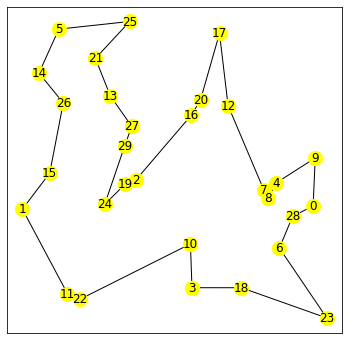

In [13]:
import matplotlib.pyplot as plt
Gt=graph_of_tour(tour)

print("size of tour:",Gt.size(weight="weight"))
print("feasibility:",nx.is_k_edge_connected(Gt,2))


plt.figure(figsize=(6,6))

nx.draw_networkx(Gt,pos=C,node_color="yellow",node_size=200,with_labels=True,edge_color="k",width=1)
plt.show()